In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import time

#### Handle Missing values

In [2]:
initData = pd.read_csv('stroke_data-40000.csv')
initData = initData[initData["sex"].notna()]

In [3]:

X = initData.iloc[:, 0:10].values
y = initData.iloc[:, 10].values

#### Splitting the dataset into the Training set and Test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling

In [5]:
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Random Forest Classifier

##### Using Validation dataset

In [6]:
depth = [i for i in range(1,75)]
depth_accuracy = []

for depth_val in depth:
    RandomForest = RandomForestClassifier(n_estimators = 100, max_depth=depth_val, n_jobs=-1)
    RandomForest.fit(X_train, y_train)
    Predicted_values = RandomForest.predict(X=X_test)
    depth_accuracy.append(accuracy_score(y_test, Predicted_values)*100)

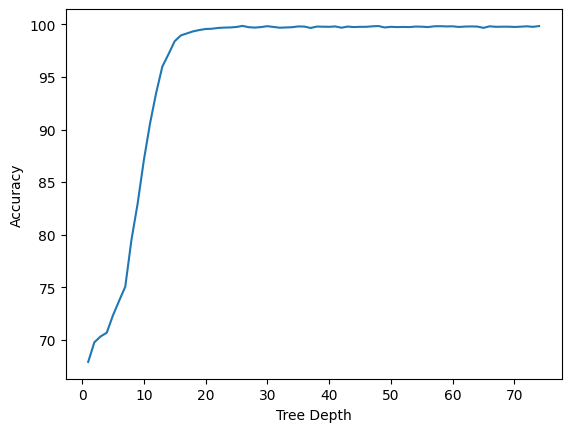

In [7]:
plt.plot(depth,depth_accuracy)
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.show()

In [8]:
estimators = [i for i in range(1,200)]
accuracy_estimators = []

for tree_num in estimators:
    RandomForest = RandomForestClassifier(n_estimators = tree_num, max_depth=15, n_jobs=-1)
    RandomForest.fit(X_train, y_train)
    Predicted_values = RandomForest.predict(X=X_test)
    accuracy_estimators.append(accuracy_score(y_test, Predicted_values)*100)

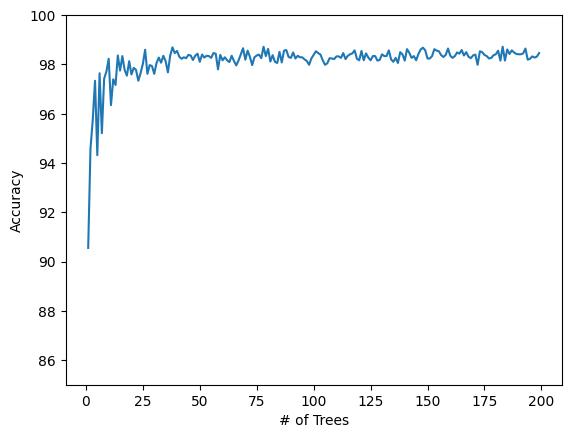

In [9]:
plt.plot(estimators,accuracy_estimators)
plt.xlabel("# of Trees")
plt.ylim((85,100))
plt.ylabel("Accuracy")
plt.show()

In [10]:
depth = [i for i in range(10,75,5)]
estimators = [i for i in range(100,201,10)]
accuracy = [[],[],[]]

for trees in estimators:
    for depth_val in depth:
        RandomForest = RandomForestClassifier(n_estimators = trees, max_depth=depth_val, n_jobs=-1)
        RandomForest.fit(X_train, y_train)
        Predicted_values = RandomForest.predict(X=X_test)
        accuracy[0].append(depth_val)
        accuracy[1].append(trees)
        accuracy[2].append(accuracy_score(y_test, Predicted_values)*100)
        

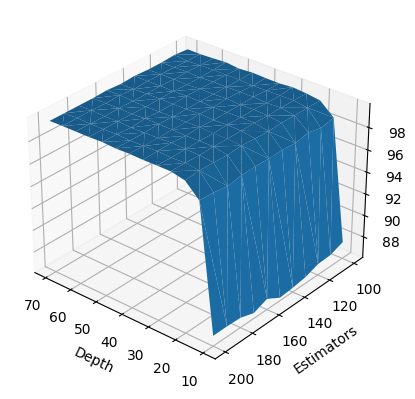

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(accuracy[0],accuracy[1],accuracy[2], edgecolor='none')
ax.set_xlabel("Depth")
ax.set_ylabel("Estimators")
ax.set_zlabel("Accuracy")
ax.view_init(30, 130)
plt.show()

In [12]:
max_accuracy = max(accuracy[2])
max_accuracy_index = accuracy[2].index(max_accuracy)

print(f'When Depth = {accuracy[0][max_accuracy_index]} and # of trees = {accuracy[1][max_accuracy_index]}, Random forest provides the maximum accuracy of {max_accuracy}% for Validation dataset')

When Depth = 55 and # of trees = 100, Random forest provides the maximum accuracy of 99.84111464189684% for Validation dataset


In [13]:
RandomForest = RandomForestClassifier(n_estimators = accuracy[1][max_accuracy_index], max_depth=accuracy[0][max_accuracy_index], n_jobs=-1)
RandomForest.fit(X_train, y_train)
Predicted_values = RandomForest.predict(X=X_test)

print("Confusion Matrix:")
for i in confusion_matrix(y_test, Predicted_values):
    print(i)
print("\nAccuracy of Decision tree: " , accuracy_score(y_test, Predicted_values)*100)
print("\nReortSummery:")
print(classification_report(y_test, Predicted_values))

Confusion Matrix:
[4098   19]
[   1 4064]

Accuracy of Decision tree:  99.75556098753361

ReortSummery:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4117
           1       1.00      1.00      1.00      4065

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182



#### Test with actual dataset (Testing Data)

In [14]:
actual_data = pd.read_csv("stroke_data-5000.csv")
actual_data.head()

actual_data = actual_data.rename({'gender': 'sex'}, axis=1)
actual_data = actual_data.replace({'sex': {'Male':1.0, 'Female':0.0}})
actual_data = actual_data.replace({'ever_married': {'No':0, 'Yes':1}})
actual_data = actual_data.replace({'work_type': {'Never_worked':0, 'children':1, 'Govt_job':2, 'Self-employed':3, 'Private':4}})
actual_data = actual_data.replace({'Residence_type': {'Rural':0, 'Urban':1}})
actual_data = actual_data.replace({'smoking_status': {'never smoked': 0, 'Unknown':0, 'formerly smoked':1, 'smokes':1}})

Actual_X = actual_data.iloc[:, 0:10].values
Actual_Y = actual_data.iloc[:, 10].values

Actual_X = sc.fit_transform(Actual_X)

In [15]:
Predicted_Actual = RandomForest.predict(X=Actual_X)

print("Confusion Matrix:")
for i in confusion_matrix(Actual_Y, Predicted_Actual):
    print(i)
print("\nAccuracy of Random Forest: " , accuracy_score(Actual_Y, Predicted_Actual)*100)
print("\nReortSummery:")
print(classification_report(Actual_Y, Predicted_Actual))

Confusion Matrix:
[4538  195]
[192  56]

Accuracy of Random Forest:  92.23047580807066

ReortSummery:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4733
           1       0.22      0.23      0.22       248

    accuracy                           0.92      4981
   macro avg       0.59      0.59      0.59      4981
weighted avg       0.92      0.92      0.92      4981



In [16]:
depth = [i for i in range(1,75)]
depth_accuracy_actual = []
for depth_val in depth:
    RandomForest = RandomForestClassifier(n_estimators = 100, max_depth=depth_val, n_jobs=-1)
    RandomForest.fit(X_train, y_train)
    Predicted_values = RandomForest.predict(X=Actual_X)
    depth_accuracy_actual.append(accuracy_score(Actual_Y, Predicted_values)*100)

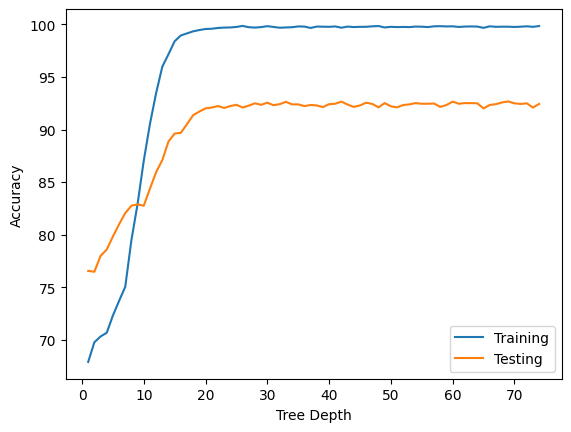

In [17]:
plt.plot(depth,depth_accuracy)
plt.plot(depth,depth_accuracy_actual)
plt.legend(['Training', 'Testing'])
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.show()

In [18]:
estimators = [i for i in range(1,200)]
accuracy_estimators_actual = []

for tree_num in estimators:
    RandomForest = RandomForestClassifier(n_estimators = tree_num, max_depth=50, n_jobs=-1)
    RandomForest.fit(X_train, y_train)
    Predicted_values = RandomForest.predict(X=Actual_X)
    accuracy_estimators_actual.append(accuracy_score(Actual_Y, Predicted_values)*100)

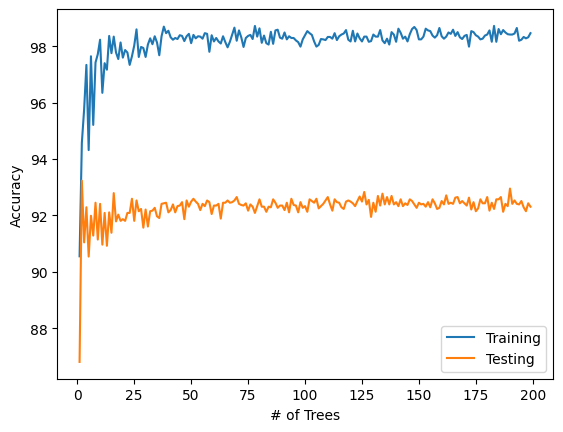

In [19]:
plt.plot(estimators,accuracy_estimators)
plt.plot(estimators,accuracy_estimators_actual)
plt.legend(['Training', 'Testing'])
plt.xlabel("# of Trees")
plt.ylabel("Accuracy")
plt.show()